In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch 
import torch.nn as nn
import torchvision
import cv2
import os

# A Simple 3D CNN Architecture

In [47]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv3d(1,out_channels=32,kernel_size=3,padding=1,stride=1)
    self.maxpool1=nn.MaxPool3d(kernel_size=2,stride=2)
    self.conv2=nn.Conv3d(32,64,kernel_size=3,padding=1,stride=1)
    self.maxpool2=nn.MaxPool3d(kernel_size=2,stride=2)
    self.linear1=nn.Linear(64*56*56*3,32)
    self.linear2=nn.Linear(32,1)
    self.relu=nn.ReLU(inplace=True)
  def forward(self,x):
    out=self.conv1(x)
    out=self.relu(out)
    #print(out.shape)
    out=self.maxpool1(out)
    #print(out.shape)
    out=self.conv2(out)
    #print(out.shape)
    out=self.relu(out)
    out=self.maxpool2(out)
    #print(out.shape)
    out=out.view(-1,64*56*56*3)
    #print(out.shape)
    out=self.linear1(out)
    #print(out.shape)
    out=self.relu(out)
    out=self.linear2(out)
    out=torch.squeeze(out)
    return out

In [48]:
model=Net()

In [14]:
img=torch.randn(1,12,224,224)
pred=model(img)
pred

torch.Size([32, 12, 224, 224])
torch.Size([32, 6, 112, 112])
torch.Size([64, 6, 112, 112])
torch.Size([64, 3, 56, 56])
torch.Size([1, 602112])
torch.Size([1, 32])


tensor(-0.2452, grad_fn=<SqueezeBackward0>)

In [15]:
mask_dir='../input/bounding-boxes/Bounding Boxes/'
images_dir='../input/sun-polyps/Polyps/'

In [16]:
#Appending the various cases
cases=(os.listdir(mask_dir))
cases=[os.path.join(mask_dir,case+'/') for case in cases]
cases=sorted(cases)
def func(x):
    y=x.split('/')[4]
    
cases[:5]

['../input/bounding-boxes/Bounding Boxes/case1/',
 '../input/bounding-boxes/Bounding Boxes/case10/',
 '../input/bounding-boxes/Bounding Boxes/case11/',
 '../input/bounding-boxes/Bounding Boxes/case12/',
 '../input/bounding-boxes/Bounding Boxes/case13/']

Creating two lists for storing polyp cases with less than 5 mm size and more than 5 mm size

In [17]:
less_more_data=pd.read_csv('../input/less-more-5/less_more.csv')
#less_5 into a list
less_5=[]
more_5=[]
for idx in range(less_more_data.shape[0]):
    try:
        less=less_more_data[less_more_data.columns[0]][idx]
        more=less_more_data[less_more_data.columns[1]][idx]
        more=int(more)
        less_5.append(less)
        more_5.append(more)
    except:
        continue
    

In [18]:
len(less_5),len(more_5)


(32, 32)

In [19]:
# A function to append 10 consecutive bounding boxes into each row of a dataframe.
# This would be very useful for forming a custom dataset and a dataloader accordingly.
columns=['case','image1','image2','image3','image4','image5','image6','image7','image8','image9','image10','image11','image12','label']
polyp_data=pd.DataFrame(columns=columns)
for idx in range(len(cases)):
    case=cases[idx]
    image_path=os.listdir(case)
    image_path_new=[os.path.join(case,item)for item in image_path]
    image_path.sort()
    case_new=case.split('/')[4]
    if case_new in less_5:
        label=0
    else:
        label=1
    num_images=0
    
    for index in range(len(image_path)):
        #print(len(image_path))
        if(num_images==len(image_path)):
            break
        temp_images=image_path[num_images:num_images+12]
        temp_images=[os.path.join(case,item) for item in temp_images]
        
        #temp_images=temp_images.sort()
        def func(x):
           
            x=x.split('.')[2]
            
            x=x[-4]+x[-3]+x[-2]+x[-1]
            x=int(x)
            print(x)
            return x
           
        temp_images.sort()
        try:
            temp_data=pd.DataFrame({
        
            'case':[case],
            'image1':[temp_images[0]],
            'image2':[temp_images[1]],
            'image3':[temp_images[2]],
            'image4':[temp_images[3]],
            'image5':[temp_images[4]],
            'image6':[temp_images[5]],
            'image7':[temp_images[6]],
            'image8':[temp_images[7]],
            'image9':[temp_images[8]],
            'image10':[temp_images[9]],
            'image11':[temp_images[10]],
            'image12':[temp_images[11]],
            'label':[label]
        })
        except:
            break
        num_images+=12
        polyp_data=pd.concat([polyp_data,temp_data],ignore_index='True')
        
   

In [20]:
for i in range(12):
    print(polyp_data[polyp_data.columns[i]][2])

../input/bounding-boxes/Bounding Boxes/case1/
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0025.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0026.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0027.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0028.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0029.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0030.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0031.jpg.png
../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_

In [21]:
polyp_data.describe()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
count,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977
unique,97,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,3977,1
top,../input/bounding-boxes/Bounding Boxes/case20/,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,../input/bounding-boxes/Bounding Boxes/case1/c...,1
freq,263,1,1,1,1,1,1,1,1,1,1,1,1,3977


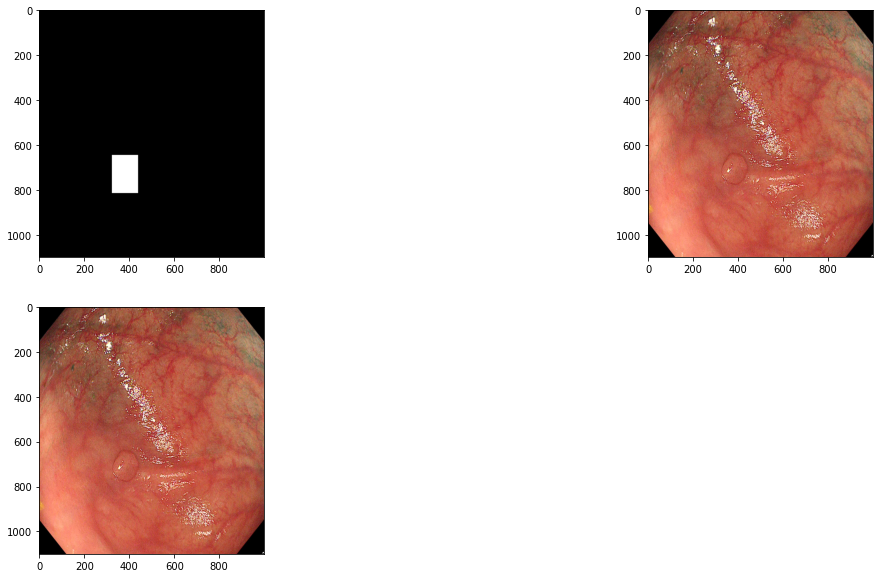

In [22]:
plt.figure(figsize=(20,10))
img1=cv2.imread('../input/bounding-boxes/Bounding Boxes/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0025.jpg.png',cv2.IMREAD_GRAYSCALE)
img1=cv2.resize(img1,(1000,1100))
img2=cv2.imread('../input/sun-polyps/Polyps/Polyps/case1/case_M_20181001100941_0U62372100109341_1_005_001-1_a10_ayy_image0025.jpg')
img2=cv2.resize(img2,(1000,1100))
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(img1,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img2)
plt.show()

In [23]:
from torch.utils.data import  Dataset

In [24]:
class seq_polyps(Dataset):
    def __init__(self,image_frames,transform=None):
        self.data=image_frames
    def __len__(self):
        return (self.data.shape[0])
    def __getitem__(self,idx):
        
        image1=self.data['image1'][idx]
       # print(image1)
        image1=cv2.imread(image1,cv2.IMREAD_GRAYSCALE)
        image1=cv2.resize(image1,(224,224))
        image1=np.expand_dims(image1,axis=2)
        image1=np.array(image1,dtype='float32')
        image1=image1/255.
        image1=np.transpose(image1,(2,0,1))
        image1=torch.tensor(image1)
        image1=image1.to(torch.float32)
     
        image2=self.data['image2'][idx]
        image2=cv2.imread(image2,cv2.IMREAD_GRAYSCALE)
        image2=cv2.resize(image2,(224,224))
        image2=np.expand_dims(image2,axis=2)
        image2=np.array(image2,dtype='float32')
        image2=image2/255.
        image2=np.transpose(image2,(2,0,1))
        image2=torch.tensor(image1)
        image2=image2.to(torch.float32)
        
        image3=self.data['image3'][idx]
        image3=cv2.imread(image3,cv2.IMREAD_GRAYSCALE)
        image3=cv2.resize(image3,(224,224))
        image3=np.expand_dims(image3,axis=2)
        image3=np.array(image3,dtype='float32')
        image3=image3/255.
        image3=np.transpose(image3,(2,0,1))
        image3=torch.tensor(image3)
        image3=image3.to(torch.float32)
        
        image4=self.data['image4'][idx]
        image4=cv2.imread(image4,cv2.IMREAD_GRAYSCALE)
        image4=cv2.resize(image4,(224,224))
        image4=np.expand_dims(image4,axis=2)
        image4=np.array(image4,dtype='float32')
        image4=image4/255.
        image4=np.transpose(image4,(2,0,1))
        image4=torch.tensor(image4)
        image4=image4.to(torch.float32)
        
        image5=self.data['image5'][idx]
        image5=cv2.imread(image5,cv2.IMREAD_GRAYSCALE)
        image5=cv2.resize(image5,(224,224))
        image5=np.expand_dims(image5,axis=2)
        image5=np.array(image5,dtype='float32')
        image5=image5/255.
        image5=np.transpose(image5,(2,0,1))
        image5=torch.tensor(image5)
        image5=image5.to(torch.float32)
        
        image6=self.data['image6'][idx]
        image6=cv2.imread(image6,cv2.IMREAD_GRAYSCALE)
        image6=cv2.resize(image6,(224,224))
        image6=np.expand_dims(image6,axis=2)
        image6=np.array(image6,dtype='float32')
        image6=image6/255.
        image6=np.transpose(image6,(2,0,1))
        image6=torch.tensor(image6)
        image6=image6.to(torch.float32)
        
        
        image7=self.data['image7'][idx]
        image7=cv2.imread(image7,cv2.IMREAD_GRAYSCALE)
        image7=cv2.resize(image7,(224,224))
        image7=np.expand_dims(image7,axis=2)
        image7=np.array(image7,dtype='float32')
        image7=image7/255.
        image7=np.transpose(image7,(2,0,1))
        image7=torch.tensor(image7)
        image7=image7.to(torch.float32)
        
        
        image8=self.data['image8'][idx]
        image8=cv2.imread(image8,cv2.IMREAD_GRAYSCALE)
        image8=cv2.resize(image8,(224,224))
        image8=np.expand_dims(image8,axis=2)
        image8=np.array(image8,dtype='float32')
        image8=image8/255.
        image8=np.transpose(image8,(2,0,1))
        image8=torch.tensor(image8)
        image8=image8.to(torch.float32)
        
        
        image9=self.data['image9'][idx]
        image9=cv2.imread(image9,cv2.IMREAD_GRAYSCALE)
        image9=cv2.resize(image9,(224,224))
        image9=np.expand_dims(image9,axis=2)
        image9=np.array(image9,dtype='float32')
        image9=image9/255.
        image9=np.transpose(image9,(2,0,1))
        image9=torch.tensor(image8)
        image9=image9.to(torch.float32)
        
        image10=self.data['image10'][idx]
        image10=cv2.imread(image10,cv2.IMREAD_GRAYSCALE)
        image10=cv2.resize(image10,(224,224))
        image10=np.expand_dims(image10,axis=2)
        image10=np.array(image10,dtype='float32')
        image10=image10/255.
        image10=np.transpose(image10,(2,0,1))
        image10=torch.tensor(image10)
        image10=image10.to(torch.float32)
        
        image11=self.data['image11'][idx]
        image11=cv2.imread(image11,cv2.IMREAD_GRAYSCALE)
        image11=cv2.resize(image11,(224,224))
        image11=np.expand_dims(image11,axis=2)
        image11=np.array(image11,dtype='float32')
        image11=image11/255.
        image11=np.transpose(image11,(2,0,1))
        image11=torch.tensor(image11)
        image11=image11.to(torch.float32)
        
        image12=self.data['image12'][idx]
        image12=cv2.imread(image12,cv2.IMREAD_GRAYSCALE)
        image12=cv2.resize(image12,(224,224))
        image12=np.expand_dims(image12,axis=2)
        image12=np.array(image12,dtype='float32')
        image12=image12/255.
        image12=np.transpose(image12,(2,0,1))
        image12=torch.tensor(image12)
        image12=image12.to(torch.float32)
        
        img=torch.stack([image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12],dim=1)
        label=self.data['label'][idx]
        
        return img,label
        
        

In [25]:
data=seq_polyps(polyp_data)

In [26]:
import warnings
warnings.filterwarnings("ignore") 

In [27]:
img,label=next(iter(data))

In [28]:
img.shape

torch.Size([1, 12, 224, 224])

Creating Training,Testing and Validation Dataset

In [29]:
from sklearn.model_selection import train_test_split
Polyp_Train,Polyp_Valid=train_test_split(polyp_data,test_size=0.2,random_state=42,stratify=polyp_data['label'])
Polyp_Valid,Polyp_Test=train_test_split(Polyp_Valid,test_size=0.6,random_state=42,stratify=Polyp_Valid['label'])
print('Length of training data: {}\nLength of testing data: {}\nLenght of validation data: {}'.format(Polyp_Train.shape[0],Polyp_Test.shape[0],Polyp_Valid.shape[0]))

Length of training data: 3181
Length of testing data: 478
Lenght of validation data: 318


In [30]:
Polyp_Train=Polyp_Train.reset_index()
Polyp_Train=Polyp_Train.drop(columns='index',axis=1)
Polyp_Train.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case70/,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,../input/bounding-boxes/Bounding Boxes/case70/...,1
1,../input/bounding-boxes/Bounding Boxes/case47/,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,../input/bounding-boxes/Bounding Boxes/case47/...,1
2,../input/bounding-boxes/Bounding Boxes/case85/,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,../input/bounding-boxes/Bounding Boxes/case85/...,1
3,../input/bounding-boxes/Bounding Boxes/case2/,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,1
4,../input/bounding-boxes/Bounding Boxes/case2/,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,../input/bounding-boxes/Bounding Boxes/case2/c...,1


In [31]:
Polyp_Test=Polyp_Test.reset_index()
Polyp_Test=Polyp_Test.drop(columns='index',axis=1)
Polyp_Test.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case71/,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,../input/bounding-boxes/Bounding Boxes/case71/...,1
1,../input/bounding-boxes/Bounding Boxes/case80/,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,1
2,../input/bounding-boxes/Bounding Boxes/case43/,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,../input/bounding-boxes/Bounding Boxes/case43/...,1
3,../input/bounding-boxes/Bounding Boxes/case80/,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,../input/bounding-boxes/Bounding Boxes/case80/...,1
4,../input/bounding-boxes/Bounding Boxes/case68/,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,../input/bounding-boxes/Bounding Boxes/case68/...,1


In [32]:
Polyp_Valid=Polyp_Valid.reset_index()
Polyp_Valid=Polyp_Valid.drop(columns='index',axis=1)
Polyp_Valid.head()

,case,image1,image2,image3,image4,image5,image6,image7,image8,image9,image10,image11,image12,label
0,../input/bounding-boxes/Bounding Boxes/case12/,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,../input/bounding-boxes/Bounding Boxes/case12/...,1
1,../input/bounding-boxes/Bounding Boxes/case14/,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,../input/bounding-boxes/Bounding Boxes/case14/...,1
2,../input/bounding-boxes/Bounding Boxes/case91/,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,../input/bounding-boxes/Bounding Boxes/case91/...,1
3,../input/bounding-boxes/Bounding Boxes/case24/,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,../input/bounding-boxes/Bounding Boxes/case24/...,1
4,../input/bounding-boxes/Bounding Boxes/case33/,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,../input/bounding-boxes/Bounding Boxes/case33/...,1


Creating dataloaders

In [33]:
train_dataset=seq_polyps(image_frames=Polyp_Train)
test_dataset=seq_polyps(image_frames=Polyp_Test)
valid_dataset=seq_polyps(image_frames=Polyp_Valid)

In [34]:
from collections import defaultdict
def calculate_accuracy(output, target):
    output = torch.sigmoid(output) >= 0.5
    target = target == 1.0
    return torch.true_divide((target == output).sum(dim=0), output.size(0)).item()
class MetricMonitor:
    def __init__(self, float_precision=3):
        self.float_precision = float_precision
        self.reset()

    def reset(self):
        self.metrics = defaultdict(lambda: {"val": 0, "count": 0, "avg": 0})

    def update(self, metric_name, val):
        metric = self.metrics[metric_name]

        metric["val"] += val
        metric["count"] += 1
        metric["avg"] = metric["val"] / metric["count"]

    def __str__(self):
        return " | ".join(
            [
                "{metric_name}: {avg:.{float_precision}f}".format(
                    metric_name=metric_name, avg=metric["avg"], float_precision=self.float_precision
                )
                for (metric_name, metric) in self.metrics.items()
            ]
        )
params = {
    "device": "cuda",
    "lr": 0.001,
    "batch_size": 2,
    "num_workers": 4,
    "epochs":5,
}


In [49]:
model = model.to(params["device"])
criterion = nn.BCEWithLogitsLoss().to(params["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])

In [36]:
from torch.utils.data import  DataLoader

In [37]:
train_loader = DataLoader(
    train_dataset, batch_size=params["batch_size"], shuffle=True, pin_memory=True,
)
val_loader = DataLoader(
    valid_dataset, batch_size=params["batch_size"], shuffle=False, pin_memory=True,
)
test_loader = DataLoader(
    test_dataset, batch_size=params["batch_size"], shuffle=False, pin_memory=True,
)

In [38]:
def train(train_loader, model, criterion, optimizer, epoch, params):
    metric_monitor = MetricMonitor()
    model.train()
    stream = tqdm(train_loader)
    for i, (images, target) in enumerate(stream, start=1):
        images = images.to(params["device"], non_blocking=True)
        images=images.float()
        target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
        output = model(images)
        target=torch.squeeze(target)
        loss = criterion(output, target)
        accuracy = calculate_accuracy(output, target)
        metric_monitor.update("Loss", loss.item())
        metric_monitor.update("Accuracy", accuracy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        stream.set_description(
            "Epoch: {epoch}. Train.      {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
        )

In [39]:
def validate(val_loader, model, criterion, epoch, params):
    metric_monitor = MetricMonitor()
    model.eval()
    stream = tqdm(val_loader)
    with torch.no_grad():
        for i, (images, target) in enumerate(stream, start=1):
            images = images.to(params["device"], non_blocking=True)
            images=images.float()
            target = target.to(params["device"], non_blocking=True).float().view(-1, 1)
            output = model(images)
            target=torch.squeeze(target)
            loss = criterion(output, target)
            accuracy = calculate_accuracy(output, target)

            metric_monitor.update("Loss", loss.item())
            metric_monitor.update("Accuracy", accuracy)
            stream.set_description(
                "Epoch: {epoch}. Validation. {metric_monitor}".format(epoch=epoch, metric_monitor=metric_monitor)
            )

In [31]:
import collections

In [40]:
from tqdm import tqdm

In [ ]:
for epoch in range(1, params["epochs"] + 1):
    train(train_loader, model, criterion, optimizer, epoch, params)
    validate(val_loader, model, criterion, epoch, params)

Epoch: 1. Train.      Loss: 0.001 | Accuracy: 0.999:  53%|█████▎    | 847/1591 [03:45<03:13,  3.85it/s]